Dataset:

https://zenodo.org/records/4561253/files/WELFake_Dataset.csv
or
https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification


In [1]:
# Python built-in libraries
from pathlib import Path

# Core Math and Visualization Libraries
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import numpy as np

# sci-kit (sklearn) is a Machine Learning Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.utils.multiclass import unique_labels

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Run this once. 
#nltk.download("punkt")
#nltk.download('wordnet')
#nltk.download('stopwords')

The first step is to load the dataset file and explore it. When exploring answer the following questions:

Q1. How many samples are there in the dataset?  
    62348

Q2. How many labels are there?  
    2

Q3. Is the dataset balanced? If not, what is the distribution? 
    yep

In [2]:
CWD = Path.cwd()
dataset_filepath = CWD.joinpath('dataset', 'WELFake_Dataset.csv')

Q4. What does the `cwd` method do? What does the `joinpath` method do?  
    gets the current file path and then combines it with the dataset im using in the format that matches the OS
    
Q5. What are 2 additional methods in a `Path` object and describe them?  

.home(): creates a starting point for paths convenietly
.replace(): replace a path with another

In [3]:
data = pd.read_csv(dataset_filepath, encoding="utf-8")
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
types_of_values = data['label'].value_counts()
print(types_of_values)

print(data["title"][0])

label
1    37106
0    35028
Name: count, dtype: int64
LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]


Q6. `pandas` returns a `DataFrame` object. How can you access individual rows from the CSV file in the `DataFrame` object?
index the particular column you want, like a 2d list



<class 'pandas.core.series.Series'>


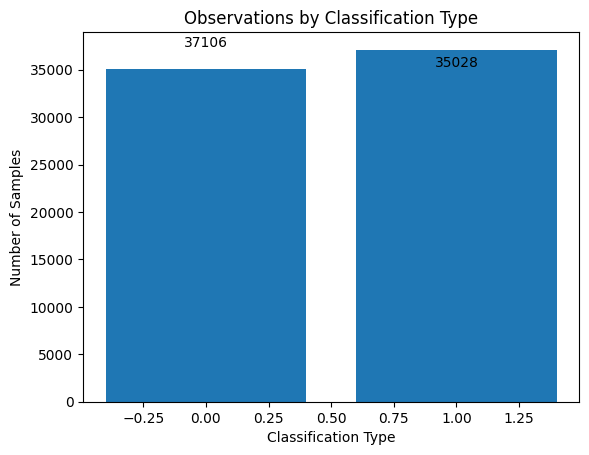

In [5]:
label_counts = data['label'].value_counts()
print(type(label_counts))

labels = label_counts.index
counts = label_counts.values

plt.bar(labels, counts)

plt.title("Observations by Classification Type")
plt.xlabel("Classification Type")
plt.ylabel("Number of Samples")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Q7. What does the `value_counts` method do? What type of object does it return?
it returns a pandas series object, kinda like a dictionary, that contains the amount of each unique index



In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['title'], data['label'], test_size=0.2, random_state=42, )


Q8. Briefly describe how `train_test_split` method works? What are some additional parameters that the function has and we can provide? Write at least two additional parameters and describe what do they mean

it returns 4 dataframes that correspond to the training x values, training y values, and the same for the test
random_state = a integer "seed" that locks in the randomness
shuffle = a bool that says weather or not to shuffle before splitting



In [7]:
import string

def preprocess_text(text: str) -> str:
    """
    This method processes a text by lower the letters, removing punctuation, removing stopwords, and lemmatizing the words.

    """
    
    lowercase_text = str(text).lower()
    lowercase_text = lowercase_text.translate(str.maketrans('', '', string.punctuation))
    split_text = lowercase_text.split()

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in split_text if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemmatized_words)

Q9. In the following code snippet, we use `apply` method to preprocess the text instead of calling `preprocess_text` on each row of the dataset. How does this work? Brielfy describe how to use the `apply` method

tells the dataframe to apply the function to every row in its columns and return the result as a new dataframe
You use it by giving it the name of a function

In [8]:
preprocessed_X_train = X_train.apply(preprocess_text)
preprocessed_X_test = X_test.apply(preprocess_text)

In [9]:
def create_bag_of_words_model(preprocessed_X_train):
    """
    This method creates a bag of words model from a preprocessed text.

    """
    
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer
    

def create_tfidf_model(preprocessed_X_train):
    """
    This method creates a tfidf model from a preprocessed text.

    """
    
    vectorizer = TfidfVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer

Q10. Describe `CountVectorizer` and `TfidfVectorizer` classes? What do they do?  Have you seen/written code that is similar to the implementation of these details before?    

Count Vectorizer: converts strings into a matrix of tokens and their counts, like we have done manually in previous projects

TfidfVectorizer:  converts strings into a matrix of tokens and their tfidf scores, like we have done manually in previous projects

Q11. What does the `fit_transform` method do?  

combines two steps, first, it learns the vocabulary (fit) from the text data and then it transforms the text into a numerical matrix based on that vocabulary (either counts or tf-idf scores)

Q12. What are two additional methods that both classes have and what do they do?  

get_feature_names_out(): Returns the list of feature names (tokens) that the vectorizer learned during the fit process

inverse_transform(): Converts the numerical matrix back into its original text format

In [10]:
bags_x_train, bags_vectorizer = create_bag_of_words_model(preprocessed_X_train)
bags_x_test = bags_vectorizer.transform(preprocessed_X_test)

In [11]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)

    return model

In [12]:
bayes_model = train_model(bags_x_train, y_train)

Q13. What are 2 additional methods of the `MultinomialNB` class? What do they do? 

predict gives class labels for input data

predict_proba gives probabilities of each class for input data

Q14. What are some other variations of the Naive Bayes model available?   

GaussianNB for continuous data

BernoulliNB for binary data


In [13]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [14]:
accuracy, cf_matrix = evaluate_model(bayes_model, bags_x_test, y_test)

In [15]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.88


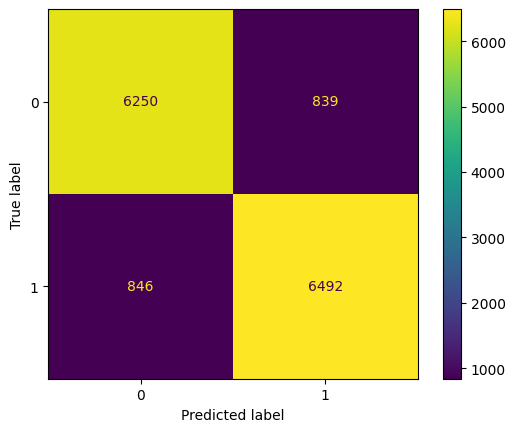

In [16]:
def visualize_accuracy(model, x_test):
    accuracy, cf_matrix = evaluate_model(model, x_test, y_test)
    print(f"The accuracy is: {accuracy: .2f}")
    ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_).plot()

ConfusionMatrixDisplay(cf_matrix, display_labels=bayes_model.classes_).plot()

In [17]:
tf_idf_x_train, tf_idf_vectorizer = create_tfidf_model(preprocessed_X_train)

In [18]:
x_tfidf_test = tf_idf_vectorizer.transform(preprocessed_X_test)

In [19]:
tf_idf_model = train_model(tf_idf_x_train, y_train)

In [20]:
accuracy, cf_matrix = evaluate_model(tf_idf_model, x_tfidf_test, y_test)

In [21]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.88


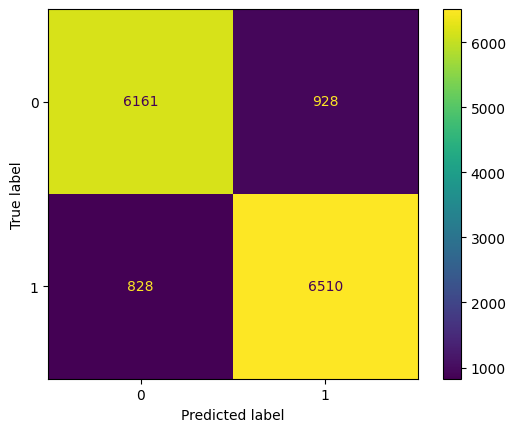

In [22]:
ConfusionMatrixDisplay(cf_matrix, display_labels=tf_idf_model.classes_).plot()

Q16. Compare the accuracy of the ML model when using Bag of Words model versus TF-IDF model. Which model performed better?

They performed the same, both about 88%

In [23]:
def train_regressor_model(x_train, y_train):
    
    model = LogisticRegression(max_iter=10000)
    model.fit(x_train, y_train)
    
    return model

In [24]:
bags_regressor = train_regressor_model(bags_x_train, y_train)

The accuracy is:  0.91


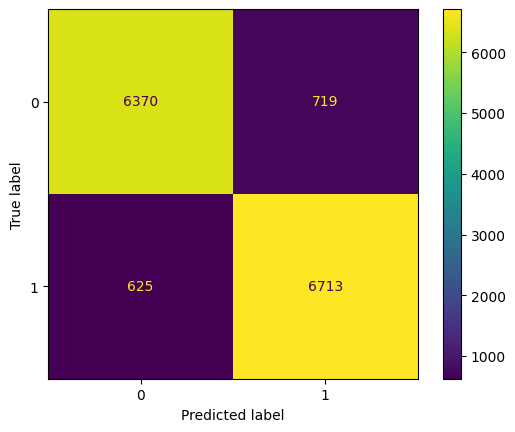

In [25]:
visualize_accuracy(bags_regressor, bags_x_test)

In [26]:
tf_idf_regressor = train_regressor_model(tf_idf_x_train, y_train)

The accuracy is:  0.90


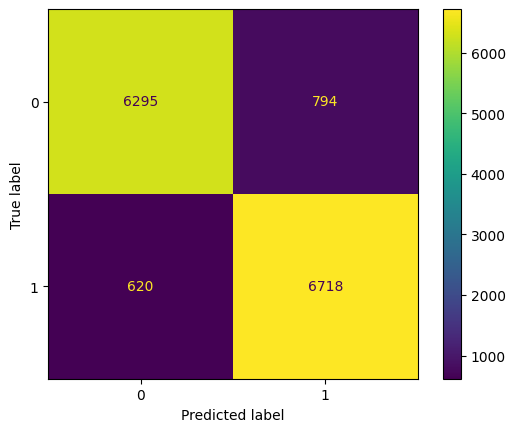

In [27]:
visualize_accuracy(tf_idf_regressor, x_tfidf_test)

In [28]:
def test_news_headline(model, vectorizer, headline):

    headline_features = vectorizer.transform([headline])

    prediction = model.predict(headline_features)

    return "Real News" if prediction[0] == 1 else "Fake News"

def test_news_headline_with_info(model, vectorizer, headline):
    headline_features = vectorizer.transform([headline])
    
    prediction = model.predict(headline_features)
    proba = model.predict_proba(headline_features)[0]
    
    print("Probabilities:", proba)
    print("Prediction:", prediction)

    return "Real News" if prediction[0] == 1 else "Fake News"

In [34]:
headline = "Obama announces Musk will lead new Department of Government Efficiency"
headline = preprocess_text(headline)

test_news_headline_with_info(bags_regressor, bags_vectorizer, headline)

Probabilities: [0.38523031 0.61476969]
Prediction: [1]


'Real News'

In [35]:
test_news_headline_with_info(tf_idf_regressor, tf_idf_vectorizer, headline)

Probabilities: [0.54453843 0.45546157]
Prediction: [0]


'Fake News'

In [31]:
def show_feature_importance(model, vectorizer, top_n=10):

    features = vectorizer.get_feature_names_out()
    coefs = model.coef_[0]

    top_pos = np.argsort(coefs)[-top_n:]
    top_neg = np.argsort(coefs)[:top_n]

    #print("Top real features:")
    #for i in top_pos:
       #print(features[i], "->", round(coefs[i], 3))

    #print("\nTop fake features:")
    #for i in top_neg:
        #print(features[i], "->", round(coefs[i], 3))

    plt.figure(figsize=(8, 6))
    plt.barh([features[i] for i in top_neg], coefs[top_neg], color='red', label='Fake News')
    plt.barh([features[i] for i in top_pos], coefs[top_pos[::1]], color='green', label='Real News')
    plt.xlabel('Importance')
    plt.title(f"Feature Importance for {model}")
    plt.legend()
    plt.tight_layout()
    plt.show()

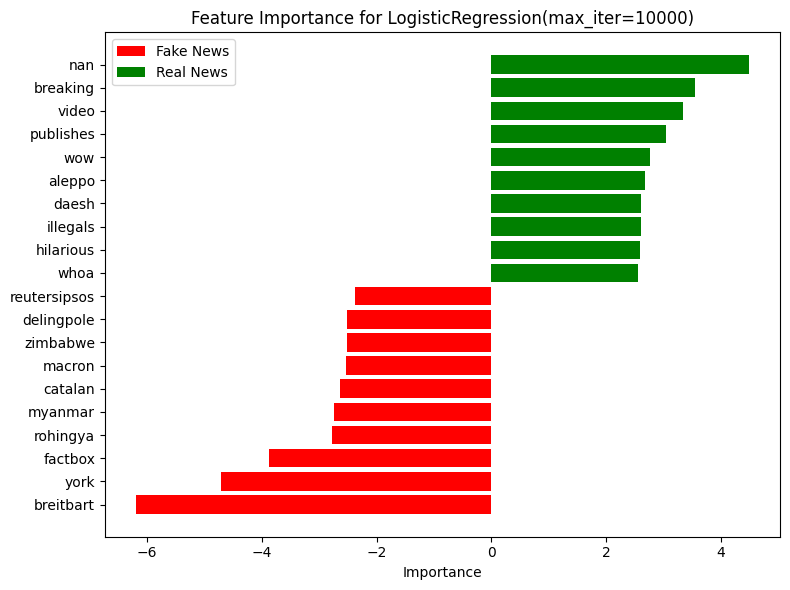

In [32]:
show_feature_importance(bags_regressor, bags_vectorizer)

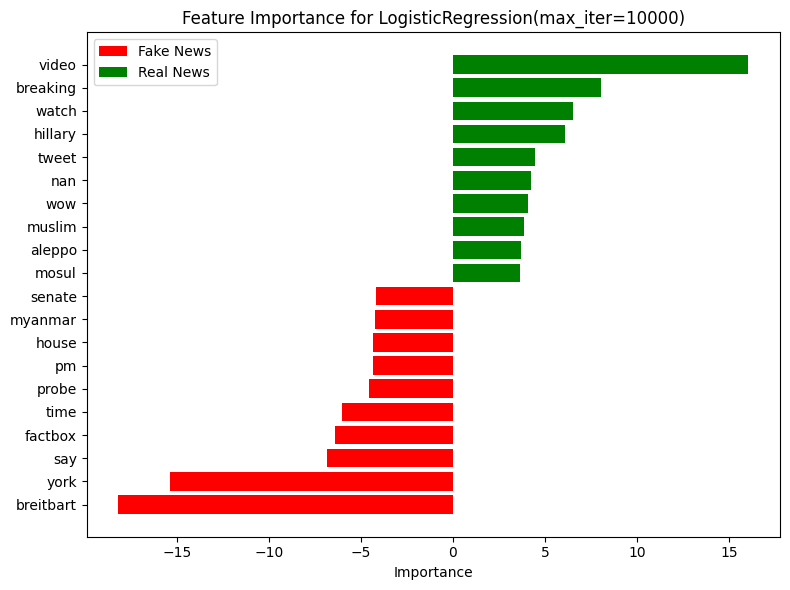

In [33]:
show_feature_importance(tf_idf_regressor, tf_idf_vectorizer)